# Importing the dependencies

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display
from sklearn.model_selection import train_test_split

# Importing the dataset

In [2]:
lfw_dataset = pd.read_csv(
    '/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/dataset-attributes.txt',
    sep='\t',)

# Exploring the dataset - Understanding the Data

In [3]:
lfw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13143 entries, 0 to 13142
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person                      13143 non-null  object 
 1   imagenum                    13143 non-null  int64  
 2   Male                        13143 non-null  float64
 3   Asian                       13143 non-null  float64
 4   White                       13143 non-null  float64
 5   Black                       13143 non-null  float64
 6   Baby                        13143 non-null  float64
 7   Child                       13143 non-null  float64
 8   Youth                       13143 non-null  float64
 9   Middle Aged                 13143 non-null  float64
 10  Senior                      13143 non-null  float64
 11  Black Hair                  13143 non-null  float64
 12  Blond Hair                  13143 non-null  float64
 13  Brown Hair                  131

In [4]:
lfw_dataset.head()

,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,Aaron Eckhart,1,1.568346,-1.889043,1.737203,-0.929729,-1.471799,-0.195580,-0.835609,-0.351468,...,0.361738,1.166118,-1.164916,-1.139990,-2.371746,-1.299932,-0.414682,-1.144902,0.694007,-0.826609
1,Aaron Guiel,1,0.169851,-0.982408,0.422709,-1.282184,-1.360060,-0.867002,-0.452293,-0.197521,...,-0.832036,-0.397680,0.874160,-0.945431,-0.268649,-0.006244,-0.030406,-0.480128,0.666760,-0.496559
2,Aaron Patterson,1,0.997749,-1.364195,-0.157377,-0.756447,-1.891825,-0.871526,-0.862893,0.031445,...,1.549743,1.884745,-0.999765,-1.359858,-1.912108,-1.095634,0.915126,-0.572332,0.144262,-0.841231
3,Aaron Peirsol,1,1.122719,-1.997799,1.916144,-2.514214,-2.580071,-1.404239,0.057551,0.000196,...,0.567822,-0.176089,1.108125,-1.600944,-3.264613,0.813418,0.308631,-0.848693,0.475941,-0.447025
4,Aaron Peirsol,2,1.078214,-2.008098,1.676211,-2.278056,-2.651845,-1.348408,0.649089,0.017656,...,-1.461474,-0.955283,0.119113,-1.128176,-3.161048,0.082680,-0.439614,-0.359859,-0.760774,-0.410152


In [5]:
lfw_dataset.tail()

,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
13138,Zorica Radovic,1,-0.205363,-0.202842,-1.232735,-1.409125,-1.804858,0.287268,-0.521815,-0.789165,...,-0.867156,-0.879554,-0.179497,0.323676,-2.188852,-1.169369,0.924397,-0.217415,-0.414024,-0.495178
13139,Zulfiqar Ahmed,1,1.957472,-2.472470,-1.307994,-0.671636,-1.960125,-0.838803,-1.365955,0.510448,...,-2.487289,2.608861,-0.954190,-1.599463,-1.238220,-1.187034,1.874130,-0.832614,0.152785,-0.554331
13140,Zumrati Juma,1,-0.037001,-1.164150,0.228494,0.187503,-1.836475,-0.958412,-0.669697,-0.480330,...,-1.938639,-0.491080,0.495067,-0.524767,-1.073731,0.111010,0.976262,-0.453027,-0.399981,-1.078655
13141,Zurab Tsereteli,1,0.282219,-0.396198,1.270470,-1.981209,-1.702940,-1.507203,-2.330721,-0.295928,...,-0.662101,-1.692131,1.284772,-0.808180,-0.710051,0.694621,0.936065,-0.767500,1.146930,-0.260940
13142,Zydrunas Ilgauskas,1,0.071197,-1.928840,2.122345,-1.892862,-2.044238,-0.313663,-0.081369,-0.140593,...,0.773205,-0.404315,-1.100768,-0.872605,-3.490632,-0.840752,0.532488,-0.946166,-0.232008,-1.257209


In [6]:
lfw_dataset.columns

Index(['person', 'imagenum', 'Male', 'Asian', 'White', 'Black', 'Baby',
       'Child', 'Youth', 'Middle Aged', 'Senior', 'Black Hair', 'Blond Hair',
       'Brown Hair', 'Bald', 'No Eyewear', 'Eyeglasses', 'Sunglasses',
       'Mustache', 'Smiling', 'Frowning', 'Chubby', 'Blurry', 'Harsh Lighting',
       'Flash', 'Soft Lighting', 'Outdoor', 'Curly Hair', 'Wavy Hair',
       'Straight Hair', 'Receding Hairline', 'Bangs', 'Sideburns',
       'Fully Visible Forehead', 'Partially Visible Forehead',
       'Obstructed Forehead', 'Bushy Eyebrows', 'Arched Eyebrows',
       'Narrow Eyes', 'Eyes Open', 'Big Nose', 'Pointy Nose', 'Big Lips',
       'Mouth Closed', 'Mouth Slightly Open', 'Mouth Wide Open',
       'Teeth Not Visible', 'No Beard', 'Goatee', 'Round Jaw', 'Double Chin',
       'Wearing Hat', 'Oval Face', 'Square Face', 'Round Face', 'Color Photo',
       'Posed Photo', 'Attractive Man', 'Attractive Woman', 'Indian',
       'Gray Hair', 'Bags Under Eyes', 'Heavy Makeup', 'Rosy Chee

In [7]:
random_person_index = np.random.randint(0, lfw_dataset.shape[0])
print("Quantity of rows:", lfw_dataset.shape[0])
print("Random index row:", random_person_index)

Quantity of rows: 13143
Random index row: 181


In [8]:
random_person = lfw_dataset.iloc[random_person_index]
random_person

person              Alastair Campbell
imagenum                            5
Male                          2.20409
Asian                       -0.652377
White                        0.889671
                          ...        
High Cheekbones             -0.724245
Brown Eyes                  -0.408959
Wearing Earrings            -0.750589
Wearing Necktie              1.338793
Wearing Necklace             -0.83909
Name: 181, Length: 75, dtype: object

# Creating the image folder path column

In [9]:
lfw_dataset['image_person_path'] = lfw_dataset['person'].astype(str).replace(' ', '_', regex=True)
lfw_dataset['image_person_path']

0             Aaron_Eckhart
1               Aaron_Guiel
2           Aaron_Patterson
3             Aaron_Peirsol
4             Aaron_Peirsol
                ...        
13138        Zorica_Radovic
13139        Zulfiqar_Ahmed
13140          Zumrati_Juma
13141       Zurab_Tsereteli
13142    Zydrunas_Ilgauskas
Name: image_person_path, Length: 13143, dtype: object

In [10]:
lfw_dataset.columns

Index(['person', 'imagenum', 'Male', 'Asian', 'White', 'Black', 'Baby',
       'Child', 'Youth', 'Middle Aged', 'Senior', 'Black Hair', 'Blond Hair',
       'Brown Hair', 'Bald', 'No Eyewear', 'Eyeglasses', 'Sunglasses',
       'Mustache', 'Smiling', 'Frowning', 'Chubby', 'Blurry', 'Harsh Lighting',
       'Flash', 'Soft Lighting', 'Outdoor', 'Curly Hair', 'Wavy Hair',
       'Straight Hair', 'Receding Hairline', 'Bangs', 'Sideburns',
       'Fully Visible Forehead', 'Partially Visible Forehead',
       'Obstructed Forehead', 'Bushy Eyebrows', 'Arched Eyebrows',
       'Narrow Eyes', 'Eyes Open', 'Big Nose', 'Pointy Nose', 'Big Lips',
       'Mouth Closed', 'Mouth Slightly Open', 'Mouth Wide Open',
       'Teeth Not Visible', 'No Beard', 'Goatee', 'Round Jaw', 'Double Chin',
       'Wearing Hat', 'Oval Face', 'Square Face', 'Round Face', 'Color Photo',
       'Posed Photo', 'Attractive Man', 'Attractive Woman', 'Indian',
       'Gray Hair', 'Bags Under Eyes', 'Heavy Makeup', 'Rosy Chee

In [11]:
lfw_dataset['image_person_path']

0             Aaron_Eckhart
1               Aaron_Guiel
2           Aaron_Patterson
3             Aaron_Peirsol
4             Aaron_Peirsol
                ...        
13138        Zorica_Radovic
13139        Zulfiqar_Ahmed
13140          Zumrati_Juma
13141       Zurab_Tsereteli
13142    Zydrunas_Ilgauskas
Name: image_person_path, Length: 13143, dtype: object

# Exploring dataset

In [12]:
image = Image.open('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/deepfunneled-images/' + lfw_dataset['image_person_path'][random_person_index] + '/' + lfw_dataset['image_person_path'][random_person_index] + '_0001.jpg')
print("Quantity of images in Dataset", lfw_dataset.shape[0])
print("Image size", image.size)
print("Number of identities", lfw_dataset.person.nunique())

Quantity of images in Dataset 13143
Image size (250, 250)
Number of identities 5721


In total, 13143 images were loaded. Each image measures 250 x 250 pixels per image. That means if we generate a model our model it will have 62500 feature columns.

### Visualizing images

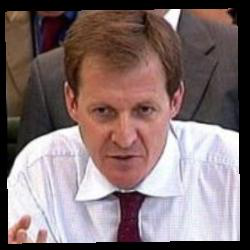

In [13]:
img = Image.open('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/deepfunneled-images/' + lfw_dataset['image_person_path'][random_person_index] + '/' + lfw_dataset['image_person_path'][random_person_index] + '_0001.jpg')
display(img)

In [14]:
### Unique identities

In [15]:
unique_persons = lfw_dataset.drop_duplicates(subset='person').head(10)

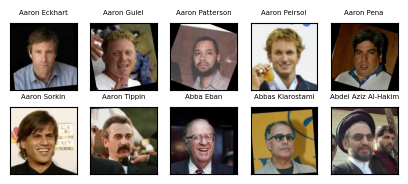

In [16]:
def get_image(image_path):
    return Image.open('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/deepfunneled-images/' + image_path + '/' + image_path + '_0001.jpg')

def visualize_lfw_images(unique_persons, n_row=2, n_col=5):
    plt.figure(figsize=(5, 2))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(get_image(unique_persons['image_person_path'].iloc[i]))
        plt.title(unique_persons['person'].iloc[i], size=5)
        plt.xticks(())
        plt.yticks(())
    plt.show()

visualize_lfw_images(unique_persons)

### Visualize the persons with more images

In [22]:
average = lfw_dataset.groupby('person').size().mean()
median = lfw_dataset.groupby('person').size().median()
min = lfw_dataset.groupby('person').size().min()
max = lfw_dataset.groupby('person').size().max()
std = lfw_dataset.groupby('person').size().std()

print(pd.DataFrame({'average': average, 'median': median, 'min': min, 'max': max, 'std': std}, index=['values']))

         average  median  min  max       std
values  2.297326     1.0    1  524  8.954638


In [17]:
number_of_images_by_person = lfw_dataset['person'].value_counts().sort_values(ascending=False)
print("Number of images by person", number_of_images_by_person)

Number of images by person person
George W Bush         524
Colin Powell          236
Tony Blair            144
Donald Rumsfeld       118
Gerhard Schroeder     108
                     ... 
Peter Fitzgerald        1
Peter Fonda             1
Peter Gabriel           1
Peter Gilmour           1
Zydrunas Ilgauskas      1
Name: count, Length: 5721, dtype: int64


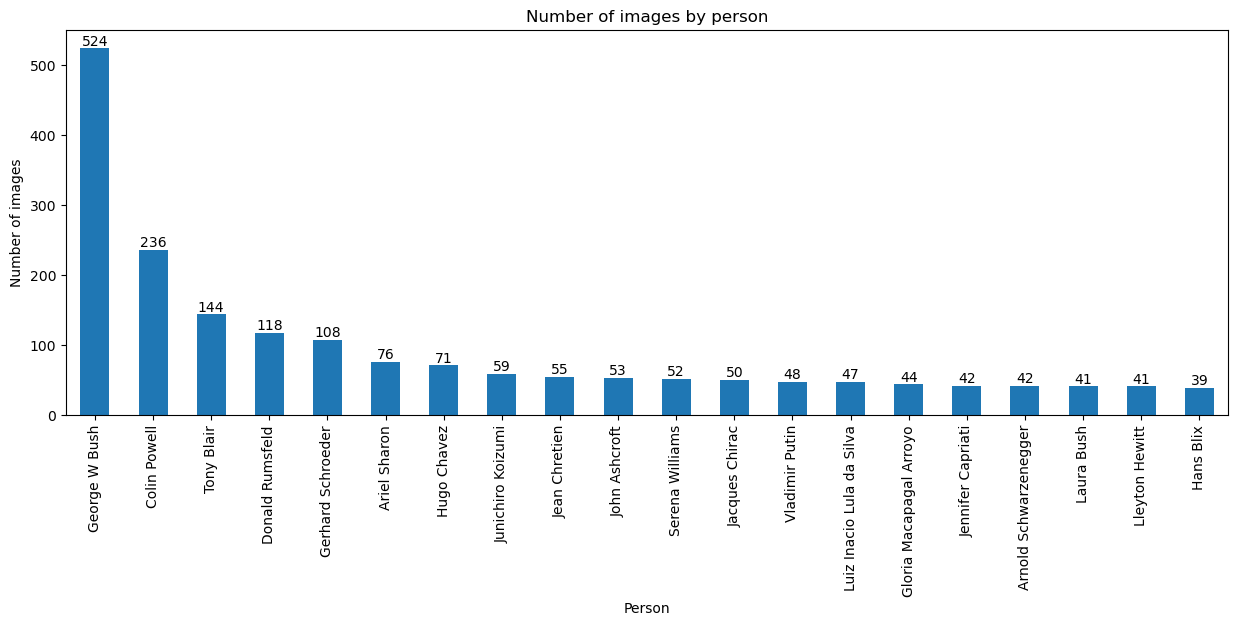

In [20]:
def plot_number_of_images_by_person(number_of_images_by_person):
    plt.figure(figsize=(15, 5))
    number_of_images_by_person.plot(kind='bar')
    plt.title('Number of images by person')
    plt.xlabel('Person')
    plt.ylabel('Number of images')
    for i, value in enumerate(number_of_images_by_person):
        plt.text(i, value, value, ha='center', va='bottom')
    plt.show()

plot_number_of_images_by_person(number_of_images_by_person[:20])

# Saving the new dataset

In [67]:
lfw_dataset.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/dataset-attributes.pkl')

# Spliting up the dataset

In [ ]:
training_set, temp_set = train_test_split(lfw_dataset, test_size=0.4, random_state=42)
validation_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

In [ ]:
print('Training set', training_set.shape)
print('Test set', test_set.shape)
print('Val set', validation_set.shape)

# Saving the datasets

In [ ]:
training_set.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/train-dataset-attributes.pkl')
test_set.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/test-dataset-attributes.pkl')
validation_set.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/lfw-dataset/val-dataset-attributes.pkl')